<a href="https://colab.research.google.com/github/nabilaaryanti/Twitter-data-processing/blob/main/Tugas_1_Kapita_Selekta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Moduls

In [ ]:
pip install docx2txt

  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3980 sha256=3d3a30ebeffcc4fd39e639dfd4a31585900f9aeadaae4a749a14d9316672e593
  Stored in directory: /root/.cache/pip/wheels/b7/20/b2/473e3aea9a0c0d3e7b2f7bd81d06d0794fec12752733d1f3a8
Successfully built docx2txt


In [ ]:
pip install Unidecode

     |████████████████████████████████| 235 kB 5.1 MB/s 


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
import cv2
from collections import Counter
plt.style.use('bmh'); sns.set()
%matplotlib inline

In [ ]:
import re, os, itertools, docx2txt
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize
from spacy.lang.id import Indonesian
from html import unescape
from unidecode import unidecode
from nltk.tokenize import TweetTokenizer; Tokenizer = TweetTokenizer(reduce_len=True)
from nltk.stem import PorterStemmer;ps = PorterStemmer()
from string import punctuation
from bz2 import BZ2File as bz2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import matplotlib.pyplot as plt
from textblob import TextBlob
import time
from tqdm import tqdm
from google.colab import files

In [ ]:
!ls

sample_data  Twitter-data-processing


# Load Data

In [ ]:
data1 = pd.read_json('/content/badminton.json', lines = True)
data2 = pd.read_json('/content/ginting1.json', lines = True)
data3 = pd.read_json('/content/ginting2.json', lines = True)
data4 = pd.read_json('/content/thomascup.json', lines = True)

In [ ]:
# menggabungkan data menjadi satu dataframe
dataFinal = pd.concat([data1, data2, data3, data4])
dataFinal = dataFinal.reset_index(drop= True)

In [ ]:
# Mengecek banyaknya baris dan kolom data
N, P = dataFinal.shape
'baris = ', N, ', Kolom = ', P

('baris = ', 41296, ', Kolom = ', 31)

In [ ]:
# mengecek 5 data pertama
dataFinal.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,2021-10-15 13:34:24+00:00,1449005740664897537,1449005740664897536,Penat aku tengok badminton,False,"[0, 26]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 936196220480978945, 'id_str': '93619622...",None,None,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-15 13:34:22+00:00,1449005730535645185,1449005730535645184,RT @FarishaChaa: Member sedap makan dekat food...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 400485536, 'id_str': '400485536', 'name...",None,None,None,NaN,False,230,0,False,False,in,{'created_at': 'Fri Oct 15 10:59:30 +0000 2021...,NaN,NaN,NaN,NaN,NaN
2,2021-10-15 13:34:21+00:00,1449005729373773826,1449005729373773824,Kalau mau OT nonton badminton aja jangan IC ga...,False,"[0, 80]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1417001386865168385, 'id_str': '1417001...",None,None,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-15 13:34:13+00:00,1449005695383203840,1449005695383203840,"Gak nonton Badminton penasaran, pas giliran bi...",False,"[0, 86]","{'hashtags': [{'text': 'ThomasCup', 'indices':...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1036309419129073664, 'id_str': '1036309...",None,None,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-15 13:34:13+00:00,1449005693717995524,1449005693717995520,weh bedebo siot tgk badminton ni,False,"[0, 32]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1288570706, 'id_str': '1288570706', 'na...",None,None,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [ ]:
dataFinal.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'lang', 'retweeted_status',
       'extended_entities', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [ ]:
dataFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41296 entries, 0 to 41295
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 41296 non-null  datetime64[ns, UTC]
 1   id                         41296 non-null  int64              
 2   id_str                     41296 non-null  int64              
 3   full_text                  41296 non-null  object             
 4   truncated                  41296 non-null  bool               
 5   display_text_range         41296 non-null  object             
 6   entities                   41296 non-null  object             
 7   metadata                   41296 non-null  object             
 8   source                     41296 non-null  object             
 9   in_reply_to_status_id      5845 non-null   float64            
 10  in_reply_to_status_id_str  5845 non-null   float64            
 11  in

In [ ]:
#menghapus entri yang memiliki data duplikat
dataFinal.iloc[dataFinal.astype(str).drop_duplicates().index]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,2021-10-15 13:34:24+00:00,1449005740664897537,1449005740664897536,Penat aku tengok badminton,False,"[0, 26]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 936196220480978945, 'id_str': '93619622...",None,None,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-15 13:34:22+00:00,1449005730535645185,1449005730535645184,RT @FarishaChaa: Member sedap makan dekat food...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 400485536, 'id_str': '400485536', 'name...",None,None,None,NaN,False,230,0,False,False,in,{'created_at': 'Fri Oct 15 10:59:30 +0000 2021...,NaN,NaN,NaN,NaN,NaN
2,2021-10-15 13:34:21+00:00,1449005729373773826,1449005729373773824,Kalau mau OT nonton badminton aja jangan IC ga...,False,"[0, 80]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1417001386865168385, 'id_str': '1417001...",None,None,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-15 13:34:13+00:00,1449005695383203840,1449005695383203840,"Gak nonton Badminton penasaran, pas giliran bi...",False,"[0, 86]","{'hashtags': [{'text': 'ThomasCup', 'indices':...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1036309419129073664, 'id_str': '1036309...",None,None,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-15 13:34:13+00:00,1449005693717995524,1449005693717995520,weh bedebo siot tgk badminton ni,False,"[0, 32]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1288570706, 'id_str': '1288570706', 'na...",None,None,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41291,2021-10-07 12:56:32+00:00,1446097110332411907,1446097110332411904,"RT @ASTROARENA: ""Masa itu saya hanya akan fiki...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 725522512545599488, 'id_str': '72552251...",NaN,NaN,None,NaN,False,16,0,False,False,in,{'created_at': 'Thu Oct 07 12:55:39 +0000 2021...,NaN,NaN,NaN,NaN,NaN
41292,2021-10-07 12:55:39+00:00,1446096884653719560,1446096884653719552,"""Masa itu saya hanya akan fikirkan macam mana ...",False,"[0, 213]","{'hashtags': [{'text': 'ThomasCup2021', 'indic...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://studio.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,None,"{'id': 160788306, 'id_str': '160788306', 'name...",NaN,NaN,None,NaN,False,16,65,False,False,in,NaN,"{'media': [{'id': 1446092814689792002, 'id_str...",0.0,NaN,NaN,NaN
41293,2021-10-07 10:47:58+00:00,1446064752677908482,1446064752677908480,@BadmintonTalk Ko Hend dan Ka Gey panutan ema...,False,"[15, 107]","{'hashtags': [{'text': 'ThomasCup2021', 'indic...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.446

In [ ]:
dataFinal = dataFinal.reset_index(drop= True)

## Statistika deskriptif

In [ ]:
dataFinal.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,contributors,retweet_count,favorite_count,possibly_sensitive,quoted_status_id,quoted_status_id_str
count,4.129600e+04,4.129600e+04,5.845000e+03,5.845000e+03,5.877000e+03,5.877000e+03,0.0,41296.000000,41296.000000,3878.000000,1.534000e+03,1.534000e+03
mean,1.448745e+18,1.448745e+18,1.448766e+18,1.448766e+18,4.047519e+17,4.047519e+17,NaN,506.668128,3.660330,0.049252,1.426784e+18,1.426784e+18
std,3.801632e+14,3.801632e+14,6.138786e+14,6.138786e+14,5.781575e+17,5.781575e+17,NaN,924.956888,82.735804,0.216422,9.044800e+16,9.044800e+16
min,1.445969e+18,1.445969e+18,1.419219e+18,1.419219e+18,3.562471e+06,3.562471e+06,NaN,0.000000,0.000000,0.000000,4.796282e+17,4.796282e+17
25%,1.448601e+18,1.448601e+18,1.448625e+18,1.448625e+18,2.223145e+09,2.223145e+09,NaN,0.000000,0.000000,0.000000,1.448218e+18,1.448218e+18
50%,1.448980e+18,1.448980e+18,1.448943e+18,1.448943e+18,2.941773e+09,2.941773e+09,NaN,5.000000,0.000000,0.000000,1.448677e+18,1.448677e+18
75%,1.448990e+18,1.448990e+18,1.448987e+18,1.448987e+18,1.088674e+18,1.088674e+18,NaN,476.000000,0.000000,0.000000,1.448972e+18,1.448972e+18
max,1.449006e+18,1.449006e+18,1.449005e+18,1.449005e+18,1.448970e+18,1.448970e+18,NaN,11453.000000,6525.000000,1.000000,1.449003e+18,1.449003e+18


In [ ]:
# Statistika Sederhana dari data "Numerik"-nya
dataFinal.corr()

,id,id_str,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,quoted_status_id,quoted_status_id_str
id,1.000000,1.000000,NaN,0.473124,0.473124,-0.222684,-0.222684,NaN,-0.037499,0.228127,-0.008095,NaN,NaN,0.035722,0.346375,0.346375
id_str,1.000000,1.000000,NaN,0.473124,0.473124,-0.222684,-0.222684,NaN,-0.037499,0.228127,-0.008095,NaN,NaN,0.035722,0.346375,0.346375
truncated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_reply_to_status_id,0.473124,0.473124,NaN,1.000000,1.000000,-0.114019,-0.114019,NaN,-0.018533,-0.001809,-0.001682,NaN,NaN,-0.217664,0.933340,0.933340
in_reply_to_status_id_str,0.473124,0.473124,NaN,1.000000,1.000000,-0.114019,-0.114019,NaN,-0.018533,-0.001809,-0.001682,NaN,NaN,-0.217664,0.933340,0.933340
in_reply_to_user_id,-0.222684,-0.222684,NaN,-0.114019,-0.114019,1.000000,1.000000,NaN,0.002173,-0.048169,-0.063034,NaN,NaN,-0.089138,-0.381267,-0.381267
in_reply_to_user_id_str,-0.222684,-0.222684,NaN,-0.114019,-0.114019,1.000000,1.000000,NaN,0.002173,-0.048169,-0.063034,NaN,NaN,-0.089138,-0.381267,-0.381267
contributors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_quote_status,-0.037499,-0.037499,NaN,-0.018533,-0.018533,0.002173,0.002173,NaN,1.000000,-0.093298,0.000413,NaN,NaN,-0.016594,NaN,NaN
retweet_count,0.228127,0.228127,NaN,-0.001809,-0.001809,-0.048169,-0.048169,NaN,-0.093298,1.000000,0.004476,NaN,NaN,0.047152,-0.201786,-0.201786


## Teks Processing

**Import Modul**

In [ ]:
pip install docx2txt

In [ ]:
pip install Unidecode

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import re, os, itertools, docx2txt
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize
from spacy.lang.id import Indonesian
from html import unescape
from unidecode import unidecode
import pandas as pd
from nltk.tokenize import TweetTokenizer; Tokenizer = TweetTokenizer(reduce_len=True)
from nltk.stem import PorterStemmer;ps = PorterStemmer()
from string import punctuation
from bz2 import BZ2File as bz2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
import time
from tqdm import tqdm
from google.colab import files

In [ ]:
!ls

sample_data  Twitter-data-processing


Load data

In [ ]:
dataFinal.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,2021-10-15 13:34:24+00:00,1449005740664897537,1449005740664897536,Penat aku tengok badminton,False,"[0, 26]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 936196220480978945, 'id_str': '93619622...",None,None,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-10-15 13:34:22+00:00,1449005730535645185,1449005730535645184,RT @FarishaChaa: Member sedap makan dekat food...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 400485536, 'id_str': '400485536', 'name...",None,None,None,NaN,False,230,0,False,False,in,{'created_at': 'Fri Oct 15 10:59:30 +0000 2021...,NaN,NaN,NaN,NaN,NaN
2,2021-10-15 13:34:21+00:00,1449005729373773826,1449005729373773824,Kalau mau OT nonton badminton aja jangan IC ga...,False,"[0, 80]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1417001386865168385, 'id_str': '1417001...",None,None,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-15 13:34:13+00:00,1449005695383203840,1449005695383203840,"Gak nonton Badminton penasaran, pas giliran bi...",False,"[0, 86]","{'hashtags': [{'text': 'ThomasCup', 'indices':...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1036309419129073664, 'id_str': '1036309...",None,None,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-15 13:34:13+00:00,1449005693717995524,1449005693717995520,weh bedebo siot tgk badminton ni,False,"[0, 32]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1288570706, 'id_str': '1288570706', 'na...",None,None,None,NaN,False,0,0,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#ubah nama kolom full_text menjadi text
dataFinal.rename(columns={'full_text':'text'}, inplace=True)

**Cleaning text**

In [ ]:
def crawlFiles(dPath, types = None):
    #dPath = 'C:/Temp', types ='pdf'
    if types:
        return [dPath+'/'+f for f in os.listdir(dPath) if f.endswith('.'+types)]
    else:
        return [dPath+'/'+f for f in os.listdir(dPath)]

In [ ]:
def readBz2(file):
    with bz2(file, "r") as bzData:
        txt = []
        for line in bzData:
            try:
                txt.append(line.strip().decode('utf-8','replace'))
            except:
                pass
    return ' '.join(txt)

In [ ]:
def LoadDocuments(dPath=None,types=None, file = None): # types = ['pdf','doc','docx','txt','bz2']
    Files, Docs = [], []
    if types:
        for tipe in types:
            Files += crawlFiles(dPath,tipe)
    if file:
        Files = [file]
    if not types and not file: # get all files regardless of their extensions
        Files += crawlFiles(dPath)
    for f in Files:
#        if f[-3:].lower()=='pdf':
#            try:
#                Docs.append(PDF(f).string)
#            except:
#                print('error reading{0}'.format(f))
        if f[-3:].lower()=='txt':
            try:
                df=open(f,"r",encoding="utf-8", errors='replace')
                Docs.append(df.readlines());df.close()
            except:
                print('error reading{0}'.format(f))
        elif f[-3:].lower()=='bz2':
            try:
                Docs.append(readBz2(f))
            except:
                print('error reading{0}'.format(f))
        elif f[-4:].lower()=='docx':
            try:
                Docs.append(docx2txt.process(f))
            except:
                print('error reading{0}'.format(f))
        elif f[-3:].lower()=='csv':
            Docs.append(pd.read_csv(f))
        else:
            print('Unsupported format {0}'.format(f))
    if file:
        Docs = Docs
    return Docs, Files

In [ ]:
def LoadStopWords(lang, sentiment = True):
    L = lang.lower().strip().split(':')
    if sentiment:
        if L == 'en' or L == 'english' or L == 'inggris':
            lemmatizer = WordNetLemmatizer()
            stops = set([t.strip().split(':') for t in LoadDocuments(file = '/content/Twitter-data-processing/text processing/stopword/20190327_stopword_id.txt')[0]])
        elif L == 'in' or L == 'indonesia' or L == 'indonesian':
            lemmatizer = Indonesian()
            stops = set([t.strip().split(':') for t in LoadDocuments(file = '/content/Twitter-data-processing/text processing/stopword_noise/20190327_stopword_noise.txt')[0]])
        else:
            print('Warning! Languange not recognized. Empty stopword given')
            stops = set(); lemmatizer = None
    else:
        if L == 'en' or L == 'english' or L == 'inggris':
            lemmatizer = WordNetLemmatizer()
            stops = set([t.strip().split(':') for t in LoadDocuments(file = '/content/Twitter-data-processing/text processing/stopword_en/20190327_stopwords_en.txt')[0]])
        elif L == 'in' or L == 'indonesia' or L == 'indonesian':
            lemmatizer = Indonesian()
            stops = set([t.strip().split(':') for t in LoadDocuments(file = '/content/Twitter-data-processing/text processing/stopword/20190327_stopword_id.txt')[0]])
        else:
            print('Warning! Languange not recognized. Empty stopword given')
            stops = set(); lemmatizer = None
    return stops, lemmatizer

In [ ]:
def fixTags(T):
    getHashtags = re.compile(r"#(\w+)")
    pisahtags = re.compile(r'[A-Z][^A-Z]*')
    t = T
    tagS = re.findall(getHashtags, T)
    for tag in tagS:
        proper_words = ' '.join(re.findall(pisahtags, tagS[0]))
        t = t.replace('#'+tag, proper_words)
    return t

In [ ]:
def getTags(T):
    getHashtags = re.compile(r"#(\w+)")
    tagS = re.findall(getHashtags, T)
    isitag = []
    for tag in tagS:
        tag = '#'+tag
        isitag.append(tag)

    return ', '.join(isitag)

In [ ]:
def cleanText(T, fix={}, pattern2 = False, lang = 'id', lemma=None, stops = set(), symbols_remove = False, numbers_remove = False, hashtag_remove = False, min_charLen = 0):
    # lang & stopS only 2 options : 'en' atau 'id'
    # symbols ASCII atau alnum
    pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    pattern1 = re.compile(r'pic.twitter.com/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    if pattern2:
        pattern2 = re.compile(r'@(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+') #remove@
        t = re.sub(pattern2, ' ',T)
    else:
        t = T
    t = re.sub(pattern,' ',t) #remove urls if any
    t = re.sub(pattern1,' ',t)
    t = unescape(t) # html entities fix
    if hashtag_remove:
        t = fixTags(t) # fix abcDef
    else:
        t = t
    t = t.lower().strip() # lowercase
    t = unidecode(t)
    t = ''.join(''.join(s)[:2] for _, s in itertools.groupby(t)) # remove repetition
    t = sent_tokenize(t) # sentence segmentation. String to list
    for i, K in enumerate(t):
        if symbols_remove:
            K = re.sub(r'[^.,a-zA-Z0-9 \n\.]',' ',K)
            K = K.replace(',',' ').replace('.',' ')
            K = ''.join(c for c in K if c not in punctuation)
            K = re.sub('\s+',' ',K).strip()

        if numbers_remove:
            K = re.sub(r'[0-9]',' ',K)
            K = re.sub('\s+',' ',K)

        cleanList = []
        if lang =='en':
            listKata = word_tokenize(K) # word tokenize
            for token in listKata:
                if token in fix.keys():
                    token = fix[token]
                if lemma:
                    token = lemma.lemmatize(token)
                if stops:
                    if len(token)>=min_charLen and token not in stops:
                        cleanList.append(token)
                else:
                    if len(token)>=min_charLen:
                        cleanList.append(token)
            t[i] = ' '.join(cleanList)
        else:
            if lemma:
                K = lemma(K)
                listKata = [token.text for token in K]
            else:
                listKata = TextBlob(K).words

            for token in listKata:
                if token in fix.keys():
                    token = fix[token]

                if lemma:
                    token = lemma(token)[0].lemma_
                    #token = stemmer.stem(token)
                if stops:
                    if len(token)>=min_charLen and token not in stops:
                        cleanList.append(token)
                else:
                    if len(token)>=min_charLen:
                        cleanList.append(token)
            t[i] = ' '.join(cleanList).lstrip()
    return ' '.join(t) # Return kalimat lagi

In [ ]:
def cleanText_(T, fix={}, min_charLen = 0):
    t = T
    t = t.lower().strip() # lowercase
    t = unidecode(t)
    t = ''.join(''.join(s)[:2] for _, s in itertools.groupby(t)) # remove repetition
    t = sent_tokenize(t) # sentence segmentation. String to list
    for i, K in enumerate(t):
        cleanList = []
        listKata = TextBlob(K).words
        for token in listKata:
            if token in fix.keys():
                token = fix[token]
                cleanList.append(token)
            else:
                if len(token)>=min_charLen:
                    cleanList.append(token)
        t[i] = ' '.join(cleanList).lstrip()
    return ' '.join(t) # Return kalimat lagi

In [ ]:
def handlingnegation (text):
    match = re.compile(r'(tidak|kurang|bukan|jangan|tapi|tetapi) (\w+)').findall(text)
    match = list(set(match))
    for i,word in enumerate(match):
        if ' '.join(match[i]) in text:
            kata = text.replace(' '.join(match[i]), str(match[i][0])+' '+'negx'+str(match[i][1]))
            text = kata
    return text

In [ ]:
def print_Topics(model, feature_names, Top_Topics, n_top_words):
    for topic_idx, topic in enumerate(model.components_[:Top_Topics]):
        print("Topic #%d:" %(topic_idx+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [ ]:
def getTopics(Txt,n_topics=5, Top_Words=7):
    #Txt = [t['nlp'] for t in Tweets] # cleaned: stopwords, stemming
    tf_vectorizer = CountVectorizer(strip_accents = 'unicode', token_pattern = r'\b[a-zA-Z]{3,}\b', max_df = 0.95, min_df = 2)
    dtm_tf = tf_vectorizer.fit_transform(Txt)
    tf_terms = tf_vectorizer.get_feature_names()
    lda_tf = LDA(n_components=n_topics, learning_method='online', random_state=0).fit(dtm_tf)
    vsm_topics = lda_tf.transform(dtm_tf); doc_topic =  [a.argmax()+1 for a in tqdm(vsm_topics)] # topic of docs
    print('In total there are {0} major topics, distributed as follows'.format(len(set(doc_topic))))
    fig4 = plt.figure(); fig4.add_subplot(111)
    plt.hist(np.array(doc_topic), alpha=0.5); plt.show()
    print('Printing top {0} Topics, with top {1} Words:'.format(n_topics, Top_Words))
    print_Topics(lda_tf, tf_terms, n_topics, Top_Words)
    return lda_tf, dtm_tf, tf_vectorizer

In [ ]:
def cleanningtext(data, both = True, onlyclean = False, sentiment = False):
    print('Cleaning Text')
    fSlang = '/content/Twitter-data-processing/text processing/slangword/20210315_slangword.txt'
    bahasa = 'id'
    stops, lemmatizer = LoadStopWords(bahasa, sentiment = False)
    sw=open(fSlang,encoding='utf-8', errors ='ignore', mode='r');SlangS=sw.readlines();sw.close()
    SlangS = {slang.strip().split(':')[0]:slang.strip().split(':')[1] for slang in SlangS}

    start_time = time.time()
    tqdm.pandas()

    if both:
        data['text'] = data['text'].astype('str')
        data['text'] = data['text'].str.lower()
        data = data[~data.text.str.contains('unavailable')]
        data['cleaned_text'] = data['text'].progress_apply(lambda x : cleanText(x,fix=SlangS, pattern2 = True, lang = bahasa, lemma=lemmatizer, stops = stops, symbols_remove = True, numbers_remove = True, hashtag_remove=False, min_charLen = 2))
        data['cleaned_text'] = data['cleaned_text'].progress_apply(lambda x : handlingnegation(x))
        #data['cleaned_text'] = data['cleaned_text'].progress_apply(lambda x : tm.handlingporn(x))
    elif onlyclean:
        data['cleaned_text'] = data['text'].progress_apply(lambda x : cleanText(x, fix=SlangS, pattern2 = True, lang = bahasa, lemma=lemmatizer, stops = stops, symbols_remove = True, numbers_remove = True, hashtag_remove=False, min_charLen = 3))
    else:
        data['cleaned_text'] = data['text'].progress_apply(lambda x : handlingnegation(x))

    data = data[data['cleaned_text'].notna()]
    print("%s seconds" %(time.time()-start_time))

    return data

In [ ]:
dataFinal = cleanningtext(data = dataFinal, both = True, onlyclean = False, sentiment = False)

Cleaning Text
Warning! Languange not recognized. Empty stopword given


100%|██████████| 41296/41296 [00:00<00:00, 217537.57it/s]


20.619443655014038 seconds


In [ ]:
Result = dataFinal[['cleaned_text']]

In [ ]:
Result.tail()

,cleaned_text
41291,retweet masa itu saya hanya akan fikirkan maca...
41292,masa itu saya hanya akan fikirkan macam mana a...
41293,ko hend dan ka gey panutan memang semangat tim...
41294,menjelang akhir tahun bakalan banyak sangat di...
41295,yang mau nonton tuc di vidio pakai kode ref hz...


In [ ]:
Result = dataFinal[['cleaned_text']]
#Result.to_csv('/content/drive/MyDrive/NLP/resulttext.txt', index=False)

## Analisis Dasar

### Likes Terbanyak

In [ ]:
dataFinal.nlargest(3, 'favorite_count')

,created_at,id,id_str,text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,cleaned_text
36266,2021-10-13 07:08:26+00:00,1448183833220685826,1448183833220685824,orang gila leading 11-7 kesalip jadi 14-11 ter...,False,"[0, 141]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1119386089058213888, 'id_str': '1119386...",NaN,NaN,None,NaN,False,1557,6525,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN,orang gila leading kesalip jadi terus ketingga...
33965,2021-10-15 12:29:27+00:00,1448989396955320327,1448989396955320320,quarter finals\nina 1-0 mas\n\nms1: anthony si...,False,"[0, 186]","{'hashtags': [{'text': 'ThomasCup2020', 'indic...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,None,"{'id': 2941773157, 'id_str': '2941773157', 'na...",NaN,NaN,None,NaN,False,2934,6325,False,False,in,NaN,NaN,0.0,NaN,NaN,NaN,quarter finals ina mas ms anthony sinisuka gin...
33134,2021-10-15 12:30:59+00:00,1448989781594042369,1448989781594042368,anthony sinisuka ginting 16-17 to 21-17 🔥🔥🔥🔥🔥🔥...,False,"[0, 87]","{'hashtags': [{'text': 'ThomasCup2020', 'indic...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 2941773157, 'id_str': '2941773157', 'na...",NaN,NaN,None,NaN,False,2179,6317,False,False,in,NaN,NaN,NaN,NaN,NaN,NaN,anthony sinisuka ginting to indonesia malaysia...


In [ ]:
dataFinal['text'][36266]

'orang gila leading 11-7 kesalip jadi 14-11 terus ketinggalan 20-16 dan nyusul 22-20 siapa yang gila ya betul namanya anthony sinisuka ginting'

In [ ]:
dataFinal['user'][36266]

{'contributors_enabled': False,
 'created_at': 'Fri Apr 19 23:43:35 +0000 2019',
 'default_profile': True,
 'default_profile_image': False,
 'description': 'more of badminton, less of me',
 'entities': {'description': {'urls': []}},
 'favourites_count': 1479,
 'follow_request_sent': False,
 'followers_count': 1868,
 'following': False,
 'friends_count': 560,
 'geo_enabled': False,
 'has_extended_profile': False,
 'id': 1119386089058213888,
 'id_str': '1119386089058213888',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': None,
 'listed_count': 11,
 'location': '',
 'name': 'pins🏸',
 'notifications': False,
 'profile_background_color': 'F5F8FA',
 'profile_background_image_url': None,
 'profile_background_image_url_https': None,
 'profile_background_tile': False,
 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/1119386089058213888/1577619719',
 'profile_image_url': 'http://pbs.twimg.com/profile_images/1447711978269528065/pCOLA1Dy_normal.jpg',
 'profile_ima

### Retweet Terbanyak

In [ ]:
dataFinal.nlargest(3, 'retweet_count')

,created_at,id,id_str,text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,cleaned_text
5115,2021-10-14 18:00:48+00:00,1448710393803657217,1448710393803657216,rt @badmintontalk: #badminton women's doubles\...,False,"[0, 140]","{'hashtags': [{'text': 'Badminton', 'indices':...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 301277063, 'id_str': '301277063', 'name...",None,None,None,NaN,False,11453,0,False,False,in,{'created_at': 'Mon Aug 02 06:35:15 +0000 2021...,NaN,NaN,NaN,NaN,NaN,retweet badminton women doubles gold medalist ...
8721,2021-10-13 15:47:53+00:00,1448314558137782273,1448314558137782272,rt @badmintontalk: match round 3 - group a\nin...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 283497596, 'id_str': '283497596', 'name...",None,None,None,NaN,False,6943,0,False,False,in,{'created_at': 'Wed Oct 13 12:46:36 +0000 2021...,NaN,NaN,NaN,NaN,NaN,retweet match round group ina tpe ms shesar hi...
9483,2021-10-13 12:47:12+00:00,1448269086778015744,1448269086778015744,rt @badmintontalk: match round 3 - group a\nin...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 899252782439350273, 'id_str': '89925278...",None,None,None,NaN,False,6943,0,False,False,in,{'created_at': 'Wed Oct 13 12:46:36 +0000 2021...,NaN,NaN,NaN,NaN,NaN,retweet match round group ina tpe ms shesar hi...


In [ ]:
dataFinal['text'][5115]

"rt @badmintontalk: #badminton women's doubles\n#gold medalist\n\ngreysia polii/apriyani rahayu #ina\n\n#tokyo2020 \n#badmintalktokyo2020 https://…"

In [ ]:
dataFinal['user'][5115]

{'contributors_enabled': False,
 'created_at': 'Thu May 19 05:59:57 +0000 2011',
 'default_profile': True,
 'default_profile_image': False,
 'description': 'Pengamat Media Sosial\nPengamat Olahraga\nInformatika\nFans VR46\n#ForzaFerrari\nhttps://t.co/9AgUqrELBv\n💯% FB\n#LO17 #LingkarOlahraga\n#OtomotifNegeriku',
 'entities': {'description': {'urls': [{'display_url': 'shadowban.eu/ArdiPegasis',
     'expanded_url': 'https://shadowban.eu/ArdiPegasis',
     'indices': [76, 99],
     'url': 'https://t.co/9AgUqrELBv'}]},
  'url': {'urls': [{'display_url': 'bit.ly/3btUWNH',
     'expanded_url': 'http://bit.ly/3btUWNH',
     'indices': [0, 23],
     'url': 'https://t.co/9xVEHtKZuj'}]}},
 'favourites_count': 354,
 'follow_request_sent': False,
 'followers_count': 8398,
 'following': False,
 'friends_count': 8731,
 'geo_enabled': True,
 'has_extended_profile': True,
 'id': 301277063,
 'id_str': '301277063',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': None,
 'listed_count

### Visualisation Tweet, reply, retweet

In [ ]:
# get list of all float type columns
# basically all columns which are some variation of in_reply_to_x or retweeted_status/user_id
float_cols = list(dataFinal.select_dtypes(include=['float']).columns.values)
print(float_cols)

['in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'contributors', 'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str']


In [ ]:
# fill Nan's for all float types
dataFinal[float_cols] = dataFinal[float_cols].fillna(0)

# convert float_cols to int
dataFinal[float_cols] = dataFinal[float_cols].astype(int)

# convert timestamp column to datetime type
dataFinal['created_at'] = pd.to_datetime(dataFinal['created_at'])

In [ ]:
# check tweets which have NaN for in_reply_to_status_id but not for in_reply_to_user_id
dataFinal[(dataFinal['in_reply_to_status_id'] == 0) & (dataFinal['in_reply_to_user_id'] != 0)].head()

,created_at,id,id_str,text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,cleaned_text
281,2021-10-15 13:15:26+00:00,1449000966259286022,1449000966259286016,@universe9light mesti tgh tgk badminton kan? haha,False,"[0, 49]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",0,0,1374631973621141504,1374631973621141504,universe9light,"{'id': 1336284431607156736, 'id_str': '1336284...",None,None,None,0,False,1,0,False,False,in,NaN,NaN,0,0,0,NaN,mesti tengah tgk badminton kan haha
822,2021-10-15 12:34:00+00:00,1448990542725992459,1448990542725992448,@badmintontalk terima kasih admin badminton ta...,False,"[0, 258]","{'hashtags': [{'text': 'ThomasCup', 'indices':...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",0,0,2941773157,2941773157,BadmintonTalk,"{'id': 990215803, 'id_str': '990215803', 'name...",None,None,None,0,False,0,0,False,False,in,NaN,NaN,0,0,0,NaN,terima kasih admin badminton talk yang terus m...
1208,2021-10-15 12:00:57+00:00,1448982223995080706,1448982223995080704,@tirasahar tira you tak tengok badminton keeeee?,False,"[0, 48]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",0,0,218521658,218521658,TiraSahar,"{'id': 462570712, 'id_str': '462570712', 'name...",None,None,None,0,False,0,0,False,False,in,NaN,NaN,0,0,0,NaN,tira you tidak negxtengok badminton kee
1247,2021-10-15 11:56:59+00:00,1448981224194646020,1448981224194646016,@qifanasir sayang. nak link tengok badminton ...,False,"[0, 60]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",0,0,239695538,239695538,qifanasir,"{'id': 268390097, 'id_str': '268390097', 'name...",None,None,None,0,False,0,0,False,False,in,NaN,NaN,0,0,0,NaN,sayang anak link tengok badminton heehheehhe
1520,2021-10-15 11:26:42+00:00,1448973606151548937,1448973606151548928,@indihomecare halo indie home gimana ya carany...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0,765035200896118784,765035200896118784,IndiHomeCare,"{'id': 1369961025663995905, 'id_str': '1369961...",None,None,None,0,False,0,0,False,False,in,NaN,NaN,0,0,0,NaN,halo indie home bagaimana ya caranya nonton ba...


In [ ]:
# save as new column
dataFinal['mention_to_user_id'] = dataFinal['in_reply_to_user_id'][(dataFinal['in_reply_to_status_id'] == 0)
                                                     & (dataFinal['in_reply_to_user_id'] != 0)]
# fill Nan's here as well
dataFinal['mention_to_user_id'] = dataFinal['mention_to_user_id'].fillna(0)

Text(0.5, 1.0, 'Tweets by type')

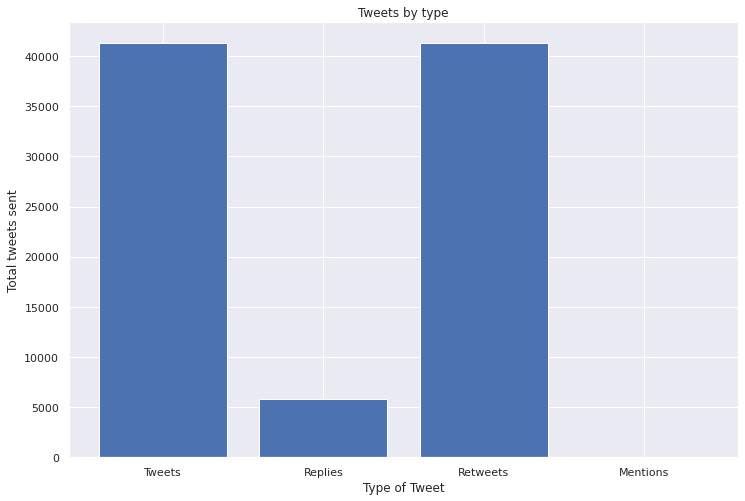

In [ ]:
# create dictionary with values to plot
# the imputed zeros need to be excluded here
data = {
        'Tweets': (dataFinal['id'] != 0).sum(),
        'Replies': (dataFinal['in_reply_to_status_id']!=0).sum(),
        'Retweets': (dataFinal['retweeted_status'] != 0).sum(),
        'Mentions':  (dataFinal['mention_to_user_id'] != 0).sum()
        }

names = list(data.keys())
values = list(data.values())

# plot the above data
# set the figure size
plt.figure(figsize=(12,8))

# create a countplot, ordered by count
plt.bar(names, values)

# set the labels and title
plt.xlabel('Type of Tweet')
plt.ylabel('Total tweets sent')
plt.title('Tweets by type')

### Twitter source by

In [ ]:
# cek twitter source
dataFinal['source'].value_counts()

<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>    29008
<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>       8014
<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>                  3676
<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>          84
<a href="https://dlvrit.com/" rel="nofollow">dlvr.it</a>                                   83
                                                                                        ...  
<a href="https://smile.wiki/" rel="nofollow">SMILE WIKI</a>                                 1
<a href="https://www.medcom.id" rel="nofollow">medcom_API</a>                               1
<a href="http://www.bigo.tv" rel="nofollow">BIGO LIVE</a>                                   1
<a href="https://twitter.com/kochengfess" rel="nofollow">KochengFess SP</a>                 1
<a href="https://biol.be/" rel="nofollow">Sunda Empire</a>  

Sebagian besar user yang mentwit pada trending "Ginting" menggunakan Twitter for Android

### Tweet Language

In [ ]:
# Cek bahasa
dataFinal['lang'].value_counts()

in    41296
Name: lang, dtype: int64

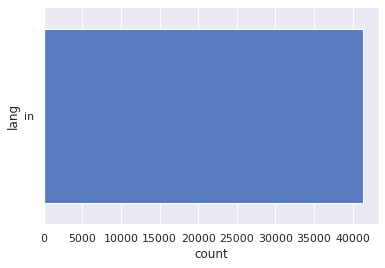

In [ ]:
ax = sns.countplot(y = 'lang', palette = 'muted', data=dataFinal)

Seruluh tweet berbahasa indonesia

### Time Analysis

In [ ]:
# create a copy of the dataframe
dataFinal_time = dataFinal.copy()

# set the timestamp column as the index and delete the column
dataFinal_time.index = dataFinal_time['created_at']
del dataFinal_time['created_at']

dataFinal_time.head()

,id,id_str,text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,cleaned_text,mention_to_user_id
created_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-10-15 13:34:24+00:00,1449005740664897537,1449005740664897536,penat aku tengok badminton,False,"[0, 26]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",0,0,0,0,None,"{'id': 936196220480978945, 'id_str': '93619622...",None,None,None,0,False,0,0,False,False,in,NaN,NaN,0,0,0,NaN,penat aku tengok badminton,0.0
2021-10-15 13:34:22+00:00,1449005730535645185,1449005730535645184,rt @farishachaa: member sedap makan dekat food...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",0,0,0,0,None,"{'id': 400485536, 'id_str': '400485536', 'name...",None,None,None,0,False,230,0,False,False,in,{'created_at': 'Fri Oct 15 10:59:30 +0000 2021...,NaN,0,0,0,NaN,retweet member sedap makan dekat foodcourt sam...,0.0
2021-10-15 13:34:21+00:00,1449005729373773826,1449005729373773824,kalau mau ot nonton badminton aja jangan ic ga...,False,"[0, 80]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",0,0,0,0,None,"{'id': 1417001386865168385, 'id_str': '1417001...",None,None,None,0,False,0,0,False,False,in,NaN,NaN,0,0,0,NaN,kalau mau ot nonton badminton saja jangan negx...,0.0
2021-10-15 13:34:13+00:00,1449005695383203840,1449005695383203840,"gak nonton badminton penasaran, pas giliran bi...",False,"[0, 86]","{'hashtags': [{'text': 'ThomasCup', 'indices':...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",0,0,0,0,None,"{'id': 1036309419129073664, 'id_str': '1036309...",None,None,None,0,False,0,0,False,False,in,NaN,NaN,0,0,0,NaN,tidak negxnonton badminton penasaran pas gilir...,0.0
2021-10-15 13:34:13+00:00,1449005693717995524,1449005693717995520,weh bedebo siot tgk badminton ni,False,"[0, 32]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",0,0,0,0,None,"{'id': 1288570706, 'id_str': '1288570706', 'na...",None,None,None,0,False,0,0,False,False,in,NaN,NaN,0,0,0,NaN,weh bedebo siot tgk badminton ini,0.0


In [ ]:
dataFinal['weekdaynum'] = dataFinal['created_at'].dt.dayofweek
dataFinal['monthdaynum'] = dataFinal['created_at'].dt.day
dataFinal['hourofday'] = dataFinal['created_at'].dt.hour

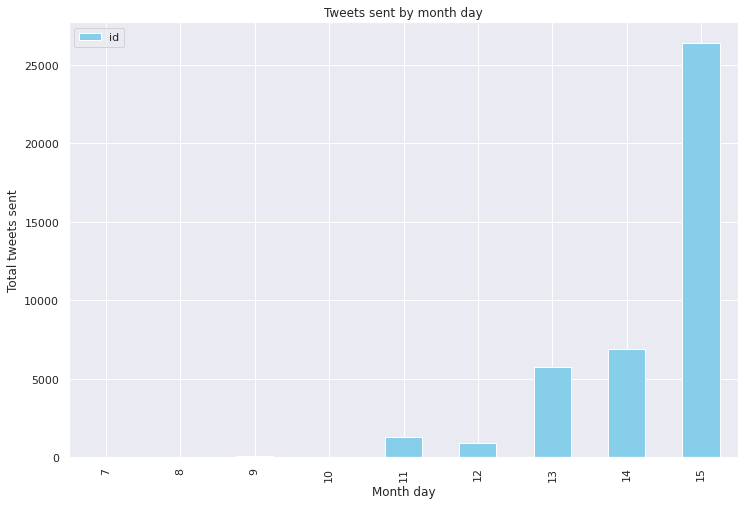

In [ ]:
# create a bar plot with month days
dataFinal.pivot_table(index='monthdaynum',values='id',aggfunc='count').plot(kind='bar',figsize=(12,8),color='skyblue')

# set the labels and title
plt.ylabel('Total tweets sent')
plt.xlabel('Month day')
plt.title('Tweets sent by month day');

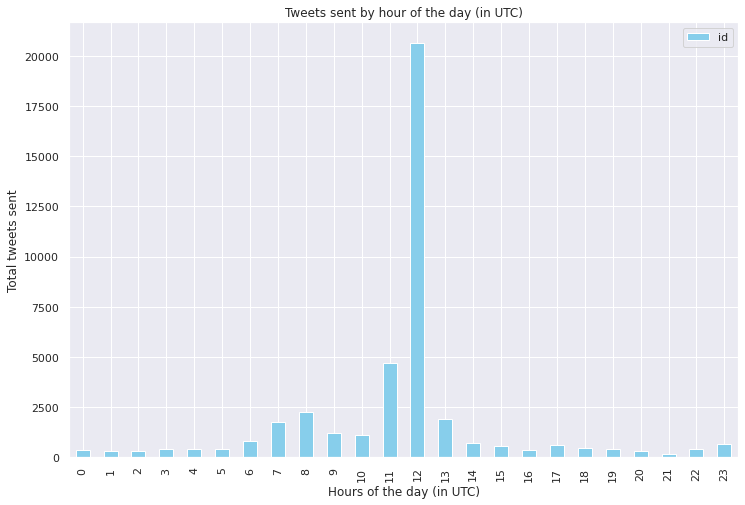

In [ ]:
# create a bar plot with hours of day
dataFinal.pivot_table(index='hourofday',values='id',aggfunc='count').plot(kind='bar',figsize=(12,8),color='skyblue')

# set the labels and title
plt.ylabel('Total tweets sent')
plt.xlabel('Hours of the day (in UTC)')
plt.title('Tweets sent by hour of the day (in UTC)');

Dari hasil EDA yang kami peroleh tren Twitter dengan "Ginting" dan "Thomas Cup" mendapatkan:
1. Like terbanyak datang dari Tweet "ORANG GILA LEADING 11-7 KESALIP JADI 14-11 TERUS KETINGGALAN 20-16 DAN NYUSUL 22-20 SIAPA YANG GILA YA BETUL NAMANYA ANTHONY SINISUKA GINTING" dengan jumlah 6.5 ribu like.

2. Bahwa Retweet terbanyak didapat dari screen_name: ArdiPegasis dengan me retweet
"@BadmintonTalk: #Badminton Women's Doubles #GOLD Medalist Greysia Polii/Apriyani Rahayu #INA #Tokyo2020 #BadmintalkTokyo2020".

3. Sorotan harian pada hari ke-15 dengan jumlah tweet lebih dari 25 ribu tweet. Dan tren 'Ginting' muncul pada hari ke 11 dengan jumlah tweet kurang dari 5 ribu tweet.

4. Untuk sorotan waktu terbanyak mendapatkan jumlah tweet lebih dari 20 ribu pada jam 12 UTC atau jam 7 PM WIB. Untuk sorotan waktu jumlah tweet paling rendah pada jam 21 UTC atau jam 4 AM WIB esok harinya.

### Voyant Tools
Dari hasil text processing, dengan menggunakan voyant tool diperoleh :

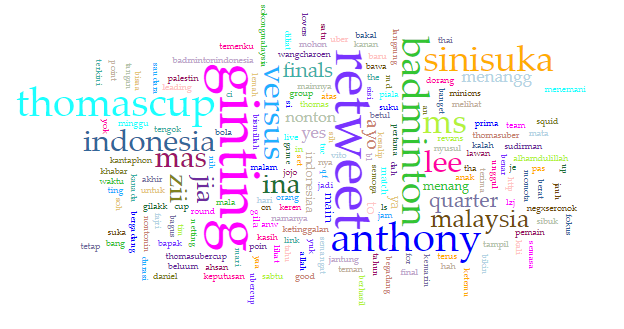

In [ ]:
wordcloud = Image.open('/content/Twitter-data-processing/image/wordcloud.png')
wordcloud

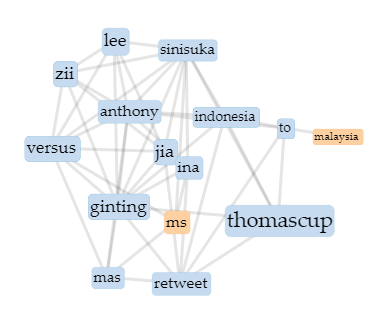

In [ ]:
link = Image.open('/content/Twitter-data-processing/image/link.png')
link

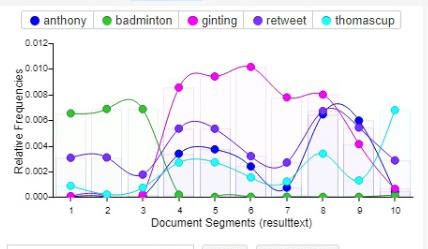

In [ ]:
trend = Image.open('/content/Twitter-data-processing/image/trends.jpeg')
trend

Pada word cloud ini terlihat bahwa kata yang paling sering muncul pada trending "Ginting" dan "Thomas Cup" pada hari Jumat, 15 Oktober 2021:
1. "Ginting" dengan jumlah 26.7 ribu
2. "retweet" dengan jumlah 21.6 ribu

Dan untuk kata lainnya yang sering muncul dalam tren:
1. anthony dengan jumlah 12.6 ribu
2. thomascup dengan jumlah 11.7 ribu
3. badminton dengan jumlah 11.3 ribu

# Geocode

In [ ]:
!pip install unidecode twython tweepy beautifulsoup4 tika

  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32891 sha256=0c6d3bc82a37069a7ac928a77f52662521c660f6688a0a54f0dfa6758ec95776
  Stored in directory: /root/.cache/pip/wheels/ec/2b/38/58ff05467a742e32f67f5d0de048fa046e764e2fbb25ac93f3
Successfully built tika


In [ ]:
import warnings; warnings.simplefilter('ignore')
import tweepy, json, nltk, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs

In [ ]:
Ck = 'TzNLDZWobWBvrIj9Iv6a9DOum' # consumer_key
Cs = 'dsM8YfWnYWXN3SIbjXeqc6bFA3o7leuIeD93J7bMLzPnsguNfA' # consumer_secret
At = '1331229969419124739-BDzaf41o3xKp5PstMXOhvQhsEmWxf7' # access_token
As = '4tJukJjqF03XrfTAytVUwqqWpRBMOFOc4XtUazBj7rJNA' # access_secret
'Done'

'Done'

In [ ]:
def twitter_connect(Ck, Cs, At, As, verbose = 0):
    try:
        auth = tweepy.OAuthHandler(Ck, Cs)
        auth.set_access_token(At, As)
        twitter = tweepy.API(auth, timeout=120)
        if verbose != 0:
            user = twitter.verify_credentials()
            print('Welcome "%s" you are now connected to twitter server' %user.name)
        return twitter
    except:
        print("Connection failed, please check your API keys or connection")
        return None

# Koneksi ke twitter
twitter = twitter_connect(Ck, Cs, At, As, verbose = 1)

Welcome "ryanti" you are now connected to twitter server


In [ ]:
# search tweet tentang "Thomas cup" di daerah sekitar UIN Jakarta
auth = tweepy.auth.OAuthHandler(Ck, Cs)
auth.set_access_token(At, As)
api = tweepy.API(auth)

Geo, N = "-6.3064075924070035,106.75452888323025,30km", 5  #berikut adalah titik koordinat daerah sekitar UIN Jakarta
qry = 'Thomas cup'
for tweet in tweepy.Cursor(api.search, q=qry, count=100, geocode=Geo).items(N):
    print([tweet.created_at, tweet.text.encode('utf-8'), tweet.user.id, tweet.geo])

[datetime.datetime(2021, 11, 1, 5, 44, 36), b'Kenapa gak ikut aja sih esp adin fei mereka baru nyampe pas thomas cup jir', 877905934000939009, None]
[datetime.datetime(2021, 11, 1, 2, 42, 45), b'~Stlh 19thn baru dpt Thomas Cup. Artinya dZaman SBY kita gk prnh dpt Thomas Cup\n\n~Prtama kali Indonesia jd Presiden\xe2\x80\xa6 https://t.co/6b0fHcjeZE', 1257347831683149824, None]
[datetime.datetime(2021, 10, 31, 19, 22, 53), b'Kecewa pasti ada. Geregetan ya masih ada juga. Pengen liat mereka menang, sudah pasti.\n\nCuma apa ya, kok gw merasa\xe2\x80\xa6 https://t.co/njfybiwPba', 40626765, None]
[datetime.datetime(2021, 10, 31, 18, 37, 27), b'@jojosuherman Oh gini ya becandaan Jojo yg menang di Thomas cup kemaren...', 137613575, None]
[datetime.datetime(2021, 10, 31, 16, 33, 18), b'@venom1828 @ainurohman Ya mrk juga siaap mantan juara dunia..mantan rangking satu dunia.masih seger baru datang gak\xe2\x80\xa6 https://t.co/VWWgafskdJ', 196410839, None]


# Kesimpulan

Dari hasil pengolahan data tidak terstruktur seperti data dari Twitter kami dapatkan bahwa saat tren "Ginting" dan "Thomas cup" naik menjadi Trending di Indonesia pada Tanggal 15 Oktober 2021 dengan sorotan waktu terbanyak pada jam 7 PM WIB bisa dikatakan pengguna twitter di Indonesia aktif pada saat waktu tersebut. Dan pula mulai menurun sorotan pada waktu 4 AM esok harinya dikarenakan tren tersebut muncul dengan adanya even yang terjadi dan warga pengguna aktif Twitter memberikan dukungan melalu media sosial.